Connecting google drive to the colab

In [2]:
from google.colab import drive
import os
# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [3]:
import numpy as np
import pandas as pd

#Importing dataset

In [4]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Dataset/twitter_training.csv")
val_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Dataset/twitter_validation.csv")

Understanding data (train data)

In [5]:
train_data.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
63693,7715,MaddenNFL,Negative,with I mean this is just insane . . . Rhandler...
74222,9118,Nvidia,Positive,Let’s all say Nvidia users can be blessed with...
21484,4077,CS-GO,Negative,"Shit update. Can't see Digg, NVIDIA Share Play..."
46713,5615,HomeDepot,Irrelevant,What... a wonderful joke. BLUE LIVES MATTER!
7173,9233,Overwatch,Positive,What Thanks y'all!.


In [6]:
train_data.shape

(74681, 4)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
train_data.isnull().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.shape

(73995, 4)

In [11]:
train_data.drop(columns = "2401", inplace = True)

In [12]:
train_data.columns = ["Company", "Sentiment", "Reviews"]

In [13]:
train_data.sample()

,Company,Sentiment,Reviews
25717,AssassinsCreed,Positive,God's new credo looks so fiery.


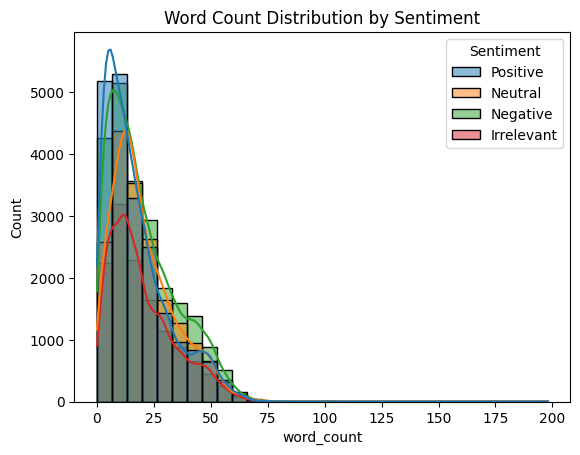

In [17]:
import matplotlib.pyplot as plt
train_data['word_count'] = train_data['Reviews'].apply(lambda x: len(str(x).split()))
sns.histplot(data=train_data, x='word_count', hue='Sentiment', bins=30, kde=True)
plt.title('Word Count Distribution by Sentiment')
plt.show()

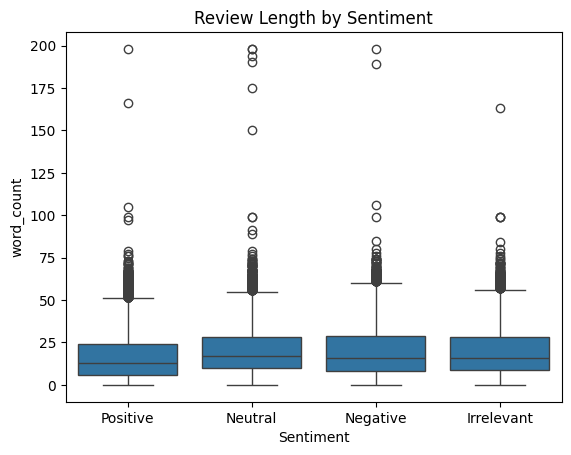

In [18]:
# Average Review Length by sentiment
import seaborn as sns
sns.boxplot(x='Sentiment', y='word_count', data=train_data)
plt.title('Review Length by Sentiment')
plt.show()

# Understanding the boxplot
The boxplot above shows the distribution of review lengths (word count) for each sentiment category (Positive, Neutral, Negative, Irrelevant). Here's what we can interpret:

Box: Represents the interquartile range (IQR), which is the middle 50% of the data. The bottom edge of the box is the first quartile (Q1), and the top edge is the third quartile (Q3).

Line inside the box: Indicates the median (Q2) word count for each sentiment. We can observe that the median review length is relatively similar across all sentiment categories.

Whiskers: Extend from the box to the minimum and maximum values within 1.5 times the IQR.

Outliers: Individual points beyond the whiskers are considered outliers, representing reviews that are significantly longer or shorter than the majority of reviews for that sentiment.

From the plot, we can see that while the typical review length is similar across sentiments, there are more reviews with a higher word count (outliers) in the Positive and Irrelevant categories compared to the Neutral and Negative categories.

In [19]:
train_data["Sentiment"].value_counts()

,count
Sentiment,
Negative,22358
Positive,20654
Neutral,18108
Irrelevant,12875


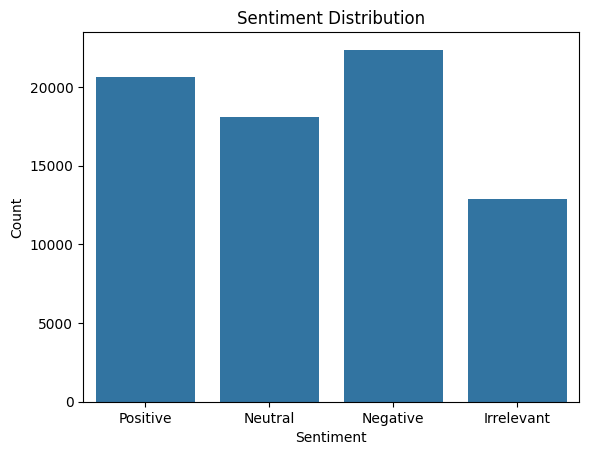

In [20]:
# Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=train_data)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [21]:
train_data[train_data['Sentiment'] == "Irrelevant"].count()

,0
Company,12875
Sentiment,12875
Reviews,12875
word_count,12875


In [22]:
train_data = train_data[train_data['Sentiment'] != "Irrelevant"]

In [46]:
train_data = train_data.reset_index(drop=True)

In [47]:
train_data.shape

(61120, 4)

In [48]:
train_data

,Company,Sentiment,Reviews,word_count
0,Borderlands,Positive,i am coming to the borders and i will kill you...,12
1,Borderlands,Positive,i am getting on borderlands and i will kill yo...,10
2,Borderlands,Positive,i am coming on borderlands and i will murder y...,10
3,Borderlands,Positive,i am getting on borderlands and i will murder...,12
4,Borderlands,Positive,i am getting into borderlands and i can murder...,10
...,...,...,...,...
61115,Nvidia,Positive,just realized that the windows partition of my...,26
61116,Nvidia,Positive,just realized that my mac window partition is ...,23
61117,Nvidia,Positive,just realized the windows partition of my mac ...,25
61118,Nvidia,Positive,just realized between the windows partition of...,32


Understanding data (validation data)

In [49]:
val_data.head()

,Company,Sentiment,Reviews
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [26]:
val_data.shape

(999, 4)

In [27]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [28]:
val_data.isnull().sum()
# no null values

,0
3364,0
Facebook,0
Irrelevant,0
"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",0


In [29]:
val_data.drop(columns= "3364", inplace = True)

In [50]:
val_data = val_data.reset_index(drop=True)

In [51]:
val_data.columns = ["Company", "Sentiment", "Reviews"]

In [31]:
val_data.sample()

,Company,Sentiment,Reviews
775,RedDeadRedemption(RDR),Negative,Red Dead Redemption 2 [Day 8] Can I shoot Mica...


In [52]:
val_data["Sentiment"].value_counts()

,count
Sentiment,
Neutral,285
Positive,277
Negative,266


In [33]:
val_data = val_data[val_data["Sentiment"] != "Irrelevant"]

#Data Preprocessing

1. Text cleaning - removing special characters, HTML tags, numbers, and converting text to lowercase in the "reviews" column

Lower casing the text

In [53]:
train_data["Reviews"][382]

'borderlands   krieg meets maya psycho krieg and the fantastic fustercluck dlc youtubecomwatchvojfck…  '

In [35]:
train_data["Reviews"] = train_data["Reviews"].str.lower()

/tmp/ipython-input-2227386388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Reviews"] = train_data["Reviews"].str.lower()


In [54]:
train_data["Reviews"][382]

'borderlands   krieg meets maya psycho krieg and the fantastic fustercluck dlc youtubecomwatchvojfck…  '

Removing Punctuation

In [37]:
train_data["Reviews"][3819]

"the rhandlerr the call of duty: black ops cold war open beta link in the e-mail sent early this morning doesn't work... pic.twitter.com/6gevf2xctx"

In [38]:
import string

PUNCT_TO_REMOVE= string.punctuation
train_data["Reviews"] = train_data["Reviews"].str.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


/tmp/ipython-input-1469870525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Reviews"] = train_data["Reviews"].str.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


In [39]:
train_data["Reviews"][3819]

'the rhandlerr the call of duty black ops cold war open beta link in the email sent early this morning doesnt work pictwittercom6gevf2xctx'

Removing numbers

In [40]:
train_data["Reviews"][53242]

'steal the dead vol 2 xbox one for both £2499 wwwto2atv2tc by'

In [41]:
import re

train_data["Reviews"] = train_data["Reviews"].str.replace(r'\d+', '', regex=True)

/tmp/ipython-input-3614779993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Reviews"] = train_data["Reviews"].str.replace(r'\d+', '', regex=True)


In [42]:
train_data["Reviews"][53242]

'steal the dead vol  xbox one for both £ wwwtoatvtc by'

Removing Contractions or normalization

In [43]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.1 MB/s eta 0:00:00


In [44]:
train_data["Reviews"][382]

'i’ve done nothing but play borderlands  for the last  years that i’m still fucking moving i started at chapter  and im only on your this letter is unnecessarily long'

In [45]:
import contractions
train_data["Reviews"] = train_data["Reviews"].apply(lambda x: contractions.fix(x))

/tmp/ipython-input-3244573028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Reviews"] = train_data["Reviews"].apply(lambda x: contractions.fix(x))


In [ ]:
train_data["Reviews"][382]

'i have done nothing but play borderlands  for the last  years that i am still fucking moving i started at chapter  and i am only on your this letter is unnecessarily long'

Lower casing the text (validation data)

In [55]:
val_data["Reviews"] = val_data["Reviews"].str.lower()

Removing numbers

In [56]:
val_data["Reviews"] = val_data["Reviews"].str.replace(r'\d+', '', regex = True)

Removing contractions

In [57]:
val_data["Reviews"] = val_data["Reviews"].apply(lambda x: contractions.fix(x))

#Tokenisation

In [ ]:
# small step to do tokenisation + lowering letters
# tokens = word_tokenize(text.lower())

In [58]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Character Tokenisation

In [59]:
from nltk.tokenize import word_tokenize
tokens = train_data["Reviews"].astype(str).apply(word_tokenize)

In [ ]:
tokens

,Reviews
0,"[i, am, coming, to, the, borders, and, i, will..."
1,"[i, am, getting, on, borderlands, and, i, will..."
2,"[i, am, coming, on, borderlands, and, i, will,..."
3,"[i, am, getting, on, borderlands, and, i, will..."
4,"[i, am, getting, into, borderlands, and, i, ca..."
...,...
74676,"[just, realized, that, the, windows, partition..."
74677,"[just, realized, that, my, mac, window, partit..."
74678,"[just, realized, the, windows, partition, of, ..."
74679,"[just, realized, between, the, windows, partit..."


In [ ]:
len(tokens)

73995

Sentence Tokenisation

In [60]:
from nltk import sent_tokenize
sentences = sent_tokenize(str(train_data["Reviews"]))
sentences

['0        i am coming to the borders and i will kill you...\n1        i am getting on borderlands and i will kill yo...\n2        i am coming on borderlands and i will murder y...\n3        i am getting on borderlands  and i will murder...\n4        i am getting into borderlands and i can murder...\n                               ...                        \n61115    just realized that the windows partition of my...\n61116    just realized that my mac window partition is ...\n61117    just realized the windows partition of my mac ...\n61118    just realized between the windows partition of...\n61119    just like the windows partition of my mac is l...\nName: Reviews, Length: 61120, dtype: object']

#Stopword removal

In [61]:
# importing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [62]:
# Setting the stopwords language as english
stop_words = set(stopwords.words('english'))

In [63]:
# Providing the words that shouldn't be removed from the text
negation = {"no", "not", "nor", "never", "cannot", "don't", "didn't",
             "isn't", "wasn't", "won't", "wouldn't", "shouldn't", "can't"}

# Removing the "negation" words from the stopwords
stop_words = stop_words - negation

In [64]:
# applying function for stopwords removal
train_data["stopwords_removed"] = tokens.apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

In [44]:
train_data

,Company,Sentiment,Reviews,stopwords_removed
0,Borderlands,Positive,i am coming to the borders and i will kill you...,"[coming, borders, kill]"
1,Borderlands,Positive,i am getting on borderlands and i will kill yo...,"[getting, borderlands, kill]"
2,Borderlands,Positive,i am coming on borderlands and i will murder y...,"[coming, borderlands, murder]"
3,Borderlands,Positive,i am getting on borderlands and i will murder...,"[getting, borderlands, murder]"
4,Borderlands,Positive,i am getting into borderlands and i can murder...,"[getting, borderlands, murder]"
...,...,...,...,...
74676,Nvidia,Positive,just realized that the windows partition of my...,"[realized, windows, partition, mac, like, year..."
74677,Nvidia,Positive,just realized that my mac window partition is ...,"[realized, mac, window, partition, years, behi..."
74678,Nvidia,Positive,just realized the windows partition of my mac ...,"[realized, windows, partition, mac, years, beh..."
74679,Nvidia,Positive,just realized between the windows partition of...,"[realized, windows, partition, mac, like, year..."


#Stemming

In [65]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

train_data["stemmed"] = train_data["stopwords_removed"].apply(
    lambda tokens: [ps.stem(word) for word in tokens]
)

In [66]:
train_data.sample()

,Company,Sentiment,Reviews,word_count,stopwords_removed,stemmed
26620,LeagueOfLegends,Negative,and rhandlerr rip again on my good game no mas...,11,"[rhandlerr, rip, good, game, no, mastery, pict...","[rhandlerr, rip, good, game, no, masteri, pict..."


In [67]:
train_data["clean_text"] = train_data["stemmed"].apply(lambda tokens: " ".join(tokens))

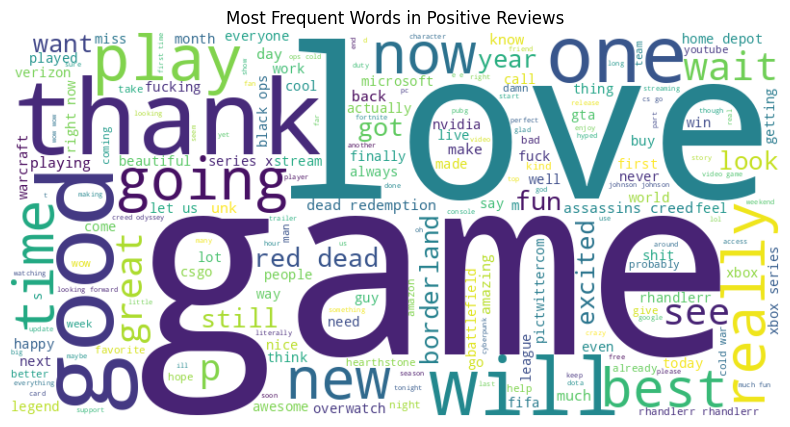

In [68]:
# Most Frequent Words
from collections import Counter
from wordcloud import WordCloud

positive_words = ' '.join(train_data[train_data['Sentiment']=='Positive']['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews')
plt.show()

In [ ]:
train_data

,Company,Sentiment,Reviews,stopwords_removed,stemmed,clean_text
0,Borderlands,Positive,i am coming to the borders and i will kill you...,"[coming, borders, kill]","[come, border, kill]",come border kill
1,Borderlands,Positive,i am getting on borderlands and i will kill yo...,"[getting, borderlands, kill]","[get, borderland, kill]",get borderland kill
2,Borderlands,Positive,i am coming on borderlands and i will murder y...,"[coming, borderlands, murder]","[come, borderland, murder]",come borderland murder
3,Borderlands,Positive,i am getting on borderlands and i will murder...,"[getting, borderlands, murder]","[get, borderland, murder]",get borderland murder
4,Borderlands,Positive,i am getting into borderlands and i can murder...,"[getting, borderlands, murder]","[get, borderland, murder]",get borderland murder
...,...,...,...,...,...,...
74676,Nvidia,Positive,just realized that the windows partition of my...,"[realized, windows, partition, mac, like, year...","[realiz, window, partit, mac, like, year, behi...",realiz window partit mac like year behind nvid...
74677,Nvidia,Positive,just realized that my mac window partition is ...,"[realized, mac, window, partition, years, behi...","[realiz, mac, window, partit, year, behind, nv...",realiz mac window partit year behind nvidia dr...
74678,Nvidia,Positive,just realized the windows partition of my mac ...,"[realized, windows, partition, mac, years, beh...","[realiz, window, partit, mac, year, behind, nv...",realiz window partit mac year behind nvidia dr...
74679,Nvidia,Positive,just realized between the windows partition of...,"[realized, windows, partition, mac, like, year...","[realiz, window, partit, mac, like, year, behi...",realiz window partit mac like year behind nvid...


#Train-test split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data["clean_text"], #cleaned text column
    train_data["Sentiment"],  #target labels (pos/neg/neutral)
    test_size=0.2,            #80/20 split
    random_state=42,
    stratify=train_data["Sentiment"] #keep class(+ve/-ve/neutral classes) balance
    )

#Feature Extraction

Applying bag of words using count vectorizer as well as tf-idf vectorizer

Note: tfidf and countvectorizer have same paramenters because they share same API in scikit-learn

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,          # limit vocabulary size
    min_df = 5,
    max_df=0.7,
    token_pattern=r'\b[a-zA-Z]{3,}\b',
    stop_words='english'
)


#Fitting model (with tfidf vectorizer)

In [74]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


Train shape: (48896, 5000)
Test shape: (12224, 5000)


#Training models using tfidf vectorizer

1. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

pred1 = model.predict(X_test_tfidf)

2. Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()
model2.fit(X_train_tfidf, y_train)

pred2 = model2.predict(X_test_tfidf)

3. SVM (LinearSVC)

In [77]:
from sklearn.svm import LinearSVC

model3 = LinearSVC()
model3.fit(X_train_tfidf, y_train)

pred3 = model3.predict(X_test_tfidf)

4. Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=200, random_state=42)
model4.fit(X_train_tfidf, y_train)

pred4 = model4.predict(X_test_tfidf)

#Calculating Accuracy score for tfidf vectorizer

In [79]:
from sklearn.metrics import accuracy_score

print("Logistic Regression model Accuracy:", accuracy_score(y_test, pred1))
print("Naive Bayes model Accuracy:", accuracy_score(y_test, pred2))
print("SVM model Accuracy:", accuracy_score(y_test, pred3))
print("Random Forest model Accuracy:", accuracy_score(y_test, pred4))

Logistic Regression model Accuracy: 0.7491819371727748
Naive Bayes model Accuracy: 0.7119600785340314
SVM model Accuracy: 0.7688972513089005
Random Forest model Accuracy: 0.9025687172774869


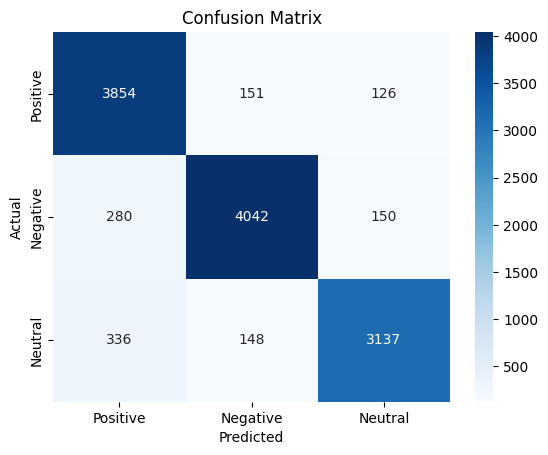

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred4, labels=['Positive', 'Negative', 'Neutral'])
labels = ['Positive', 'Negative', 'Neutral']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

precision_score and recall_score showed same scores but f1 showed a lil bit lesser results

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_features=5000,          # limit vocabulary size
    min_df=5,                   # ignore words that appear in <5 docs
    max_df=0.7,                 # ignore very common words (>70% docs)
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # only keep words with 3+ letters
    stop_words='english'        # remove standard stopwords
)

#Fitting model (with countvectorizer)

In [88]:
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

print("Train shape:", X_train_count.shape)
print("Test shape:", X_test_count.shape)

Train shape: (48896, 5000)
Test shape: (12224, 5000)


#Training models and calculating accuracy score

In [86]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_count, y_train)
    preds = model.predict(X_test_count)
    print(f"{name} Accuracy:", accuracy_score(y_test, preds))


Logistic Regression Accuracy: 0.7700425392670157
Naive Bayes Accuracy: 0.7019797120418848
SVM Accuracy: 0.772496727748691
Random Forest Accuracy: 0.9021596858638743


Hence we can see, through both vectorizers accuracy score is so much similar (both can be used)

#Working with validation data

In [87]:
val_data.sample()

,Company,Sentiment,Reviews
544,RedDeadRedemption(RDR),Positive,my favourite games\ngod of war\nred dead rede...


#Preprocessing on validation data

Tokenisation, Stopwords removal, Stemming, transform, calculating score

In [91]:
# Tokenisation
val_tokens = val_data["Reviews"].astype(str).apply(word_tokenize)

In [92]:
#Stopwords Removal
val_data["stopwords_removed"] = val_tokens.apply(
    lambda val_tokens: [word for word in val_tokens if word not in stop_words]
)

In [93]:
# Stemming
val_data["stemmed"] = val_data["stopwords_removed"].apply(
    lambda val_tokens: [ps.stem(word) for word in val_tokens]
)
val_data["clean_text"] = val_data["stemmed"].apply(lambda val_tokens: " ".join(val_tokens))

In [94]:
# Transforming with countvectorizer, predicting and calculating accuracy
X_val_count = vectorizer.transform(val_data["clean_text"])

pred9 = model.predict(X_val_count)
pred10 = model2.predict(X_val_count)
pred11 = model3.predict(X_val_count)
pred12 = model4.predict(X_val_count)

print("Logistic Regression model Accuracy:", accuracy_score(val_data["Sentiment"], pred9))
print("Naive Bayes model Accuracy:", accuracy_score(val_data["Sentiment"], pred10))
print("SVM model Accuracy:", accuracy_score(val_data["Sentiment"], pred11))
print("Random Forest model Accuracy:", accuracy_score(val_data["Sentiment"], pred12))

Logistic Regression model Accuracy: 0.9444444444444444
Naive Bayes model Accuracy: 0.748792270531401
SVM model Accuracy: 0.822463768115942
Random Forest model Accuracy: 0.9057971014492754


In [98]:
# # Transforming with tfidf vectorizer, predicting and calculating accuracy
X_val_tfidf = tfidf.transform(val_data["clean_text"])

pred13 = model.predict(X_val_tfidf)
pred14 = model2.predict(X_val_tfidf)
pred15 = model3.predict(X_val_tfidf)
pred16 = model4.predict(X_val_tfidf)

print("Logistic Regression model Accuracy:", accuracy_score(val_data["Sentiment"], pred13))
print("Naive Bayes model Accuracy:", accuracy_score(val_data["Sentiment"], pred14))
print("SVM model Accuracy:", accuracy_score(val_data["Sentiment"], pred15))
print("Random Forest model Accuracy:", accuracy_score(val_data["Sentiment"], pred16))

Logistic Regression model Accuracy: 0.4577294685990338
Naive Bayes model Accuracy: 0.7596618357487923
SVM model Accuracy: 0.855072463768116
Random Forest model Accuracy: 0.9251207729468599


#Dumping the model and the vectorizer

In [97]:
import joblib

joblib.dump(model4, "/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/sentiment_model_ml.pkl") #Saving model
joblib.dump(vectorizer, "/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/vectorizer_ml.pkl")  #Saving vectorizer too(important!)
joblib.dump(tfidf, "/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/tfidf_ml.pkl")

['/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/tfidf_ml.pkl']